# Is the championship won by offense or defense?
### Thing to explore:
Does championship teams 
1. Do championship teams stand out more in terms of offensive or defensive efficiency compared to the rest of the teams?
2. How do these statistics compare to other championship teams? Or other teams in the playoffs? Or from teams across the league?

Data source:
https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('databases/cbb.csv', header=None, skiprows=1)

header = pd.read_csv('databases/cbb.csv', nrows=1, header=None).iloc[0].tolist()
df.columns = header

df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


## Filtering data for better results

Excluding teams that have participated in less than ten seasons in total - for example, due to fresh promotion to the league, which would be unfair and the set of teams would not be equalized.

In [3]:
df_grouped = df.groupby('TEAM')['YEAR'].size()

teams_all_years = df_grouped[df_grouped == 10]
df_all_years = df[df['TEAM'].isin(teams_all_years.index)] #jakieś .isnot?

print(f"Dataset before excluding teams: {df.shape}")
print(f"Dataset after excluding teams: {df_all_years.shape}")

df_excluded_teams = df[~df['TEAM'].isin(teams_all_years.index)]
df_excluded_teams['TEAM'].unique()

Dataset before excluding teams: (3523, 24)
Dataset after excluding teams: (3330, 24)


array(['UMass Lowell', 'North Alabama', 'Brown', 'Columbia', 'Cornell',
       'Dartmouth', 'Penn', 'Princeton', 'Yale', 'Harvard',
       'Bethune Cookman', 'Maryland Eastern Shore', 'Savannah St.',
       'Arkansas Little Rock', 'Little Rock', 'Abilene Christian',
       'Houston Baptist', 'Incarnate Word', 'IPFW', 'Fort Wayne',
       'Grand Canyon', 'Cal Baptist', 'UC San Diego', 'Dixie St.',
       'Merrimack', 'Tarleton St.', 'Bellarmine', 'Utah Tech',
       'St. Thomas', 'Houston Christian', 'Lindenwood',
       'Texas A&M Commerce', 'Stonehill', 'Southern Indiana', 'Queens'],
      dtype=object)

## Creating new datafreames
1. Containing only non-playoffs teams **df_all_years_nonpo**
2. Only playoffs teams **df_all_years_po**
3. Only championship teams **df_all_years_champs**

In [4]:
df_all_years_nonpo = df_all_years[df_all_years['POSTSEASON'].isnull()]
df_all_years_nonpo.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
3353,LSU,SEC,33,14,105.9,104.2,0.5459,47.3,51.8,18.4,...,30.3,46.2,52.1,32.7,34.3,65.8,-7.3,NaN,NaN,2023
2649,Milwaukee,Horz,22,10,101.3,107.9,0.3248,49.5,52.6,15.3,...,35.0,49.7,49.9,32.9,37.9,69.6,-8.8,NaN,NaN,2021
1261,Sam Houston St.,Slnd,31,22,101.6,94.4,0.6991,47.6,45.1,19.7,...,41.1,47.3,43.9,32.1,32.2,65.0,-3.4,NaN,NaN,2015
2655,Northern Iowa,MVC,23,10,102.0,103.0,0.4725,50.0,52.9,19.1,...,27.7,51.1,54.2,32.2,34.1,69.2,-9.0,NaN,NaN,2021
1765,Wake Forest,ACC,31,13,99.6,96.5,0.5916,48.5,50.8,20.7,...,35.5,47.1,49.5,34.5,35.9,69.2,-7.5,NaN,NaN,2013


In [5]:
df_all_years_po = df_all_years[~df_all_years['POSTSEASON'].isnull()]
df_all_years_po.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
23,Kansas,B12,36,31,121.5,94.5,0.9472,56.1,48.1,17.6,...,30.0,53.6,45.3,40.4,35.6,71.4,11.0,E8,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
2271,Holy Cross,Pat,35,15,96.7,106.9,0.2398,47.9,53.2,16.8,...,33.4,47.2,52.8,32.6,35.7,64.6,-14.5,R64,16.0,2016
2205,Marquette,BE,32,19,121.8,101.8,0.8881,57.5,52.2,17.3,...,35.7,52.7,50.6,42.9,36.8,71.5,0.6,R64,10.0,2017
2420,Baylor,B12,34,27,116.4,93.9,0.9226,52.5,46.1,20.6,...,30.1,52.2,45.0,35.3,32.2,65.1,7.9,S16,3.0,2017


In [6]:
df_all_years_champs = df_all_years[df_all_years['POSTSEASON'] == 'Champions']
df_all_years_champs = df_all_years_champs.sort_values(by='YEAR').reset_index(drop=True)
df_all_years_champs.sample(5)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
2,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Kansas,B12,40,34,119.8,91.3,0.9580,53.8,45.8,17.3,...,27.7,53.6,46.4,36.1,29.8,69.1,10.4,Champions,1.0,2022
9,Connecticut,BE,39,31,121.5,91.2,0.9643,53.9,44.4,18.9,...,37.8,53.6,44.4,36.3,29.7,66.7,5.0,Champions,4.0,2023
1,Connecticut,Amer,40,32,112.5,91.3,0.9171,51.5,44.6,17.3,...,35.7,48.1,42.2,38.7,33.0,64.8,4.7,Champions,7.0,2014
5,Villanova,BE,40,36,128.4,94.1,0.9725,59.5,48.5,15.0,...,26.7,59.0,49.0,40.1,31.7,69.6,10.6,Champions,1.0,2018


## Creating new dataframes

Based on previous "heavier" versions with only **YEAR** and **ADJOE/ADJDE** features - the offense/defense stats are aggregated by their mean

In [7]:
all_teams_offense_means = df_all_years.groupby('YEAR')['ADJOE'].mean().reset_index()
all_teams_defense_means = df_all_years.groupby('YEAR')['ADJDE'].mean().reset_index()
all_teams_defense_means

nonpo_offense_means = df_all_years_nonpo.groupby('YEAR')['ADJOE'].mean().reset_index()
nonpo_defense_means = df_all_years_nonpo.groupby('YEAR')['ADJDE'].mean().reset_index()
nonpo_defense_means

po_offense_means = df_all_years_po.groupby('YEAR')['ADJOE'].mean().reset_index()
po_defense_means= df_all_years_po.groupby('YEAR')['ADJDE'].mean().reset_index()
po_defense_means

champ_offense_means = df_all_years_champs.groupby('YEAR')['ADJOE'].mean().reset_index()
champ_defense_means = df_all_years_champs.groupby('YEAR')['ADJDE'].mean().reset_index()
champ_defense_means

,YEAR,ADJDE
0,2013,84.5
1,2014,91.3
2,2015,90.6
3,2016,90.9
4,2017,91.5
5,2018,94.1
6,2019,89.9
7,2021,94.5
8,2022,91.3
9,2023,91.2


## Renaming ADJOE and ADJDE columns for them to not be conflicted in merged dataframe

In [9]:
all_teams_offense_means = all_teams_offense_means.rename(columns={"ADJOE": "ADJOE1"})
nonpo_offense_means = nonpo_offense_means.rename(columns={"ADJOE": "ADJOE2"})
po_offense_means = po_offense_means.rename(columns={"ADJOE": "ADJOE3"})
champ_offense_means = champ_offense_means.rename(columns={"ADJOE": "ADJOE4"})

all_teams_defense_means = all_teams_defense_means.rename(columns={"ADJDE": "ADJDE1"})
nonpo_defense_means = nonpo_defense_means.rename(columns={"ADJDE": "ADJDE2"})
po_defense_means = po_defense_means.rename(columns={"ADJDE": "ADJDE3"})
champ_defense_means = champ_defense_means.rename(columns={"ADJDE": "ADJDE4"})

# Łączymy po YEAR
df_all_adjoe = all_teams_offense_means.merge(nonpo_offense_means, on="YEAR").merge(po_offense_means, on="YEAR").merge(champ_offense_means, on="YEAR")
df_all_adjde = all_teams_defense_means.merge(nonpo_defense_means, on="YEAR").merge(po_defense_means, on="YEAR").merge(champ_defense_means, on="YEAR")
df_all_adjoe

,YEAR,ADJOE1,ADJOE2,ADJOE3,ADJOE4
0,2013,101.023724,98.957519,109.226866,115.9
1,2014,104.803003,102.901504,112.352239,112.5
2,2015,102.503303,100.348872,111.056716,125.2
3,2016,103.997297,102.077154,111.765152,123.1
4,2017,103.984685,101.704511,113.037313,121.0
5,2018,104.570270,102.623684,112.298507,128.4
6,2019,103.522823,101.555805,111.480303,123.0
7,2021,102.071772,100.062921,110.198485,123.2
8,2022,102.576276,100.713910,109.970149,119.8
9,2023,104.346547,102.462172,111.969697,121.5


In [10]:
df_all_adjoe['DIFF_CHMP_PO'] = round((((df_all_adjoe['ADJOE4'] - df_all_adjoe['ADJOE3']) / df_all_adjoe['ADJOE3']) * 100),2)
df_all_adjoe

df_all_adjde['DIFF_CHMP_PO'] = round((((df_all_adjde['ADJDE4'] - df_all_adjde['ADJDE3']) / df_all_adjde['ADJDE3']) * 100),2)
df_all_adjde

,YEAR,ADJDE1,ADJDE2,ADJDE3,ADJDE4,DIFF_CHMP_PO
0,2013,100.740240,102.445489,93.970149,84.5,-10.08
1,2014,104.387387,106.079323,97.670149,91.3,-6.52
2,2015,102.108408,103.677820,95.877612,90.6,-5.50
3,2016,103.740240,105.295506,97.448485,90.9,-6.72
4,2017,103.636036,105.253759,97.213433,91.5,-5.88
5,2018,104.134535,105.686090,97.974627,94.1,-3.95
6,2019,103.186486,104.884644,96.316667,89.9,-6.66
7,2021,101.783784,103.360674,95.404545,94.5,-0.95
8,2022,102.048949,103.630827,95.768657,91.3,-4.67
9,2023,103.885886,105.443820,97.583333,91.2,-6.54


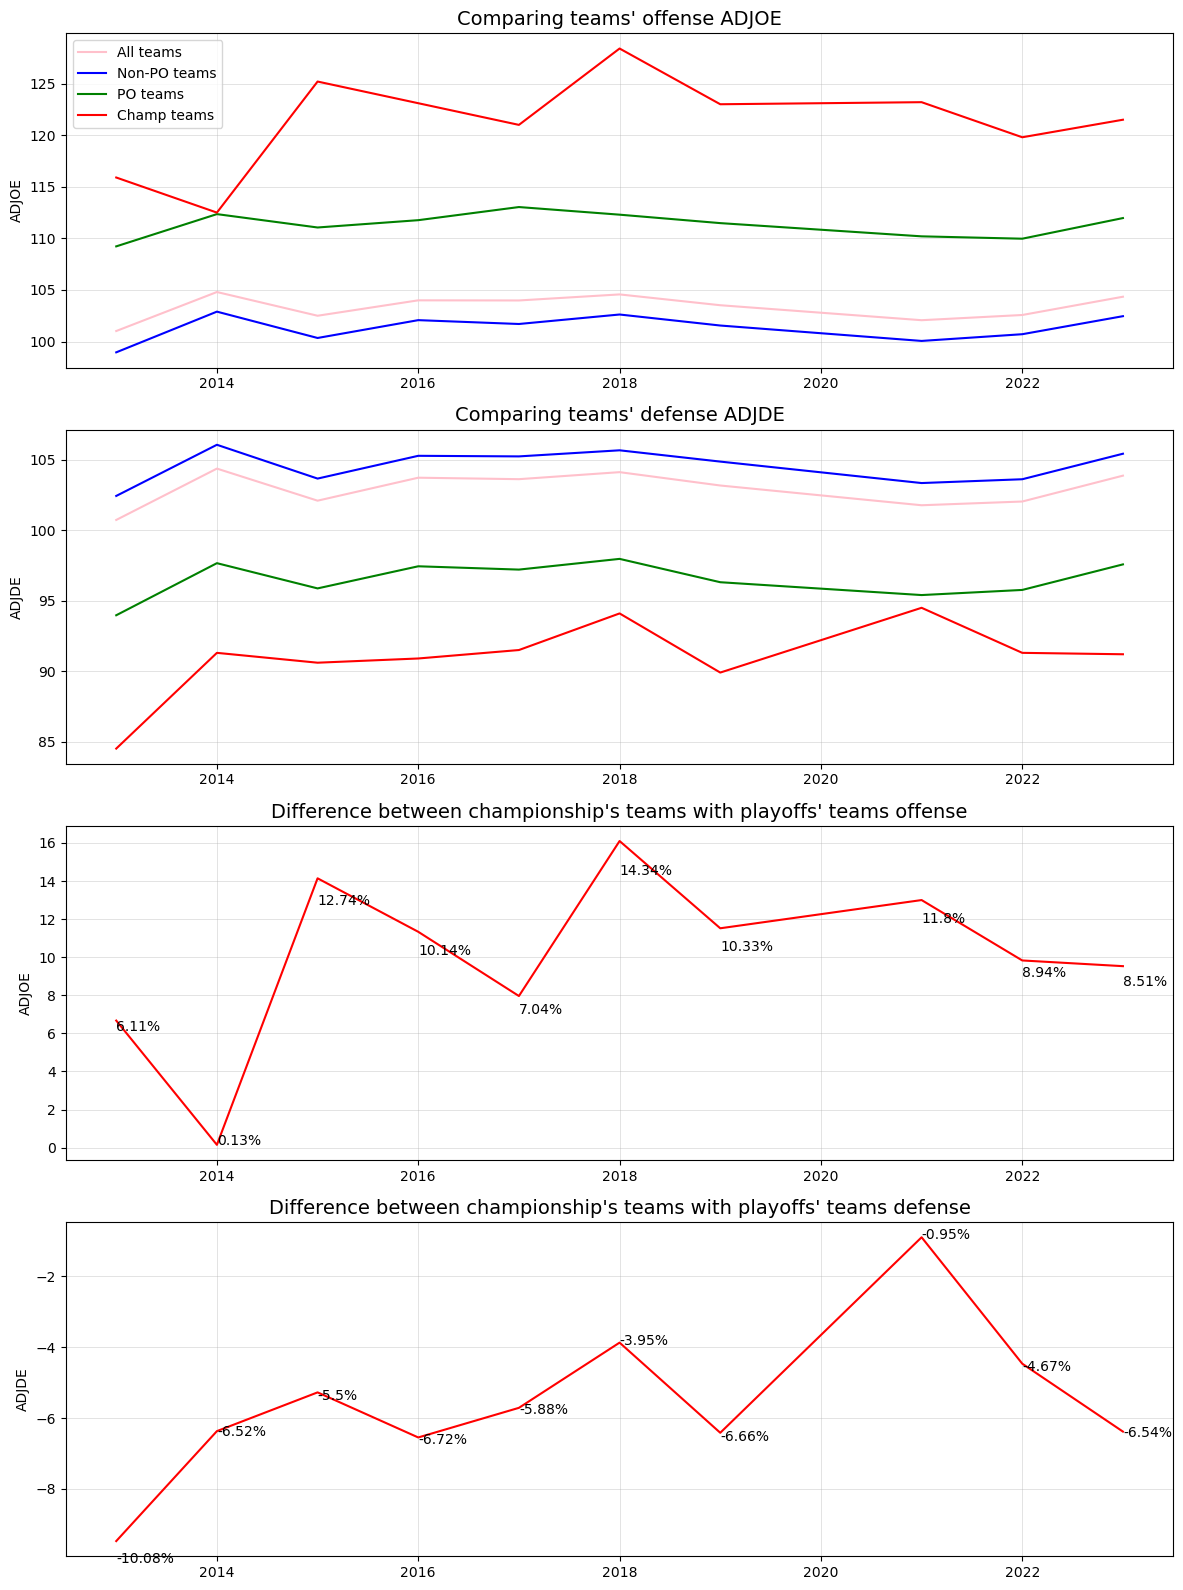

In [15]:
fig, ax = plt.subplots(4,1,figsize=(12, 16))

ax[0].plot(df_all_adjoe['YEAR'], df_all_adjoe['ADJOE1'], color='pink', label='All teams')
ax[0].plot(df_all_adjoe['YEAR'], df_all_adjoe['ADJOE2'], color='blue', label='Non-PO teams')
ax[0].plot(df_all_adjoe['YEAR'], df_all_adjoe['ADJOE3'], color='green', label='PO teams')
ax[0].plot(df_all_adjoe['YEAR'], df_all_adjoe['ADJOE4'], color='red', label='Champ teams')
ax[0].legend(loc=0)
ax[0].set_title("Comparing teams' offense ADJOE", fontsize=14)
ax[0].set_ylabel("ADJOE")
ax[0].grid(True, linewidth=0.5, alpha=0.5)

ax[1].plot(df_all_adjde['YEAR'], df_all_adjde['ADJDE1'], color='pink')
ax[1].plot(df_all_adjde['YEAR'], df_all_adjde['ADJDE2'], color='blue')
ax[1].plot(df_all_adjde['YEAR'], df_all_adjde['ADJDE3'], color='green')
ax[1].plot(df_all_adjde['YEAR'], df_all_adjde['ADJDE4'], color='red')
ax[1].set_title("Comparing teams' defense ADJDE", fontsize=14)
ax[1].set_ylabel("ADJDE")
ax[1].grid(True, linewidth=0.5, alpha=0.5)

ax[2].plot(df_all_adjoe['YEAR'], df_all_adjoe['ADJOE4']-df_all_adjoe['ADJOE3'], color='red')
for x, txt in enumerate(df_all_adjoe['DIFF_CHMP_PO']):
    ax[2].text(df_all_adjoe['YEAR'][x], df_all_adjoe['DIFF_CHMP_PO'][x], f'{txt}%', fontsize=10)
ax[2].set_title("Difference between championship's teams with playoffs' teams offense", fontsize=14)
ax[2].set_ylabel("ADJOE")
ax[2].grid(True, linewidth=0.5, alpha=0.5)

ax[3].plot(df_all_adjde['YEAR'], df_all_adjde['ADJDE4']-df_all_adjde['ADJDE3'], color='red')
for x, txt in enumerate(df_all_adjde['DIFF_CHMP_PO']):
    ax[3].text(df_all_adjde['YEAR'][x], df_all_adjde['DIFF_CHMP_PO'][x], f'{txt}%', fontsize=10)
ax[3].set_title("Difference between championship's teams with playoffs' teams defense", fontsize=14)
ax[3].set_ylabel("ADJDE")
ax[3].grid(True, linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()